In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import env
import os
import chenchen_prepare

In [2]:
df = chenchen_prepare.get_logs_dataset()
df.head()

df shape: (900223, 11)


,date,time,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2.0


In [3]:
df = chenchen_prepare.clean_dates(df)
df = chenchen_prepare.get_endpoint_targets(df)
df = chenchen_prepare.map_program_id(df)
df = chenchen_prepare.clean_anomalies(df)
df = chenchen_prepare.clean_lesson(df)
df = chenchen_prepare.missing_values(df)

new df shape: (900223, 11)
df shape: (900223, 13)


In [4]:
df.shape

(900222, 14)

In [5]:
df.isnull().sum()

date                0
time                0
endpoint            0
user_id             0
cohort_id       52893
ip                  0
name            52893
slack           52893
start_date      52893
end_date        52893
program_id      52893
class               0
topic               0
program_type    52893
dtype: int64

* Keep the rest of the null value for exploration.

### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

Here I will answer this question by different program: DS, FS_PHP and FS_JAVA.

* DS program

In [6]:
# create a dataframe for ds
ds = df[df.program_id == 3]

# due to the imbalaced value counts, here I will only compare top three cohorts referred to classes
ds1 = ds[(ds.name == 'Darden')|(ds.name =='Bayes')|(ds.name =='Curie')]
ds1.name.value_counts()

Darden    32015
Bayes     26538
Curie     21581
Name: name, dtype: int64

In [7]:
ds1['class'].value_counts().head(6)  # only compare the five 5 classes

ds-fundamentals      10509
ds-sql                9521
ds-classification     8910
ds-python             7831
0                     6659
ds-regression         6348
Name: class, dtype: int64

<AxesSubplot:xlabel='name,class'>

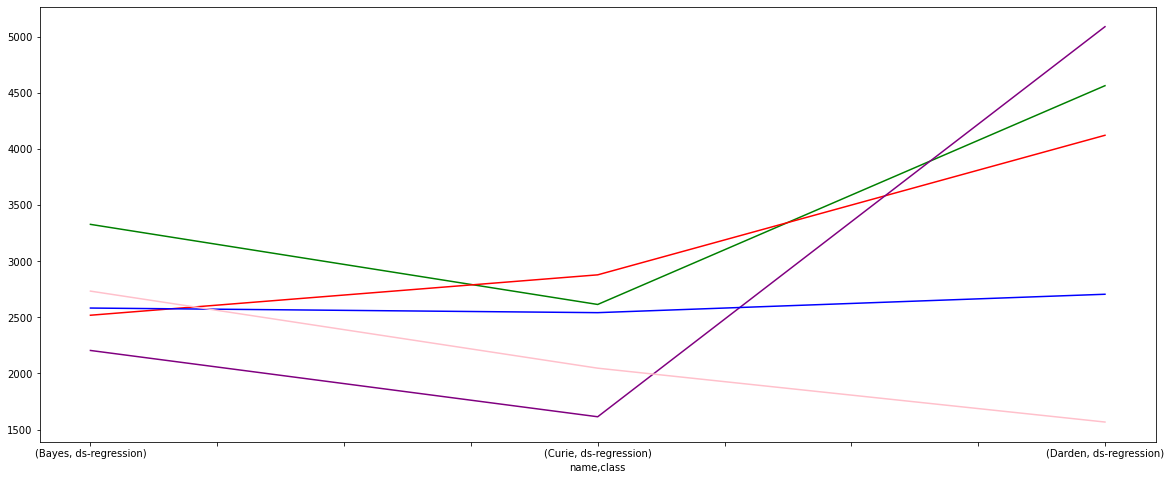

In [8]:
# viz of the top five classes in the top three cohorts
ds1[ds1['class'] == 'ds-fundamentals'].groupby('name')['class'].value_counts().plot(figsize=(20,8),color = 'green')
ds1[ds1['class'] == 'ds-sql'].groupby('name')['class'].value_counts().plot(color = 'red')
ds1[ds1['class'] == 'ds-classification'].groupby('name')['class'].value_counts().plot(color = 'purple')
ds1[ds1['class'] == 'ds-python'].groupby('name')['class'].value_counts().plot(color = 'blue')
ds1[ds1['class'] == 'ds-regression'].groupby('name')['class'].value_counts().plot(color = 'pink')

* from the line chart, we can see classification has the biggest angle

In [9]:
ds1[ds1['class'] == 'ds-classification'].groupby('name')['class'].value_counts()

name    class            
Bayes   ds-classification    2205
Curie   ds-classification    1614
Darden  ds-classification    5091
Name: class, dtype: int64

<AxesSubplot:ylabel='name,class'>

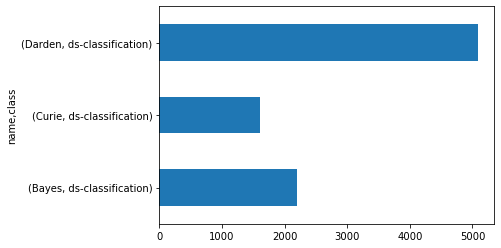

In [10]:
ds1[ds1['class'] == 'ds-classification'].groupby('name')['class'].value_counts().plot.barh()

In [11]:
5091/1614, 5091/2205

(3.154275092936803, 2.308843537414966)

* Darden referred classification the most. 3.15 times more than Curie and 2.31 times more than Bayes.

* FS_PHP_program

In [12]:
# create dataframe for PHP
fs_php = df[df.program_id == 1]

# use top two cohorts due to imbalanced value counts
fs_php1 = fs_php[(fs_php.name == 'Lassen') | (fs_php.name == 'Arches')]
fs_php1.name.value_counts()

Lassen    9587
Arches    8890
Name: name, dtype: int64

In [13]:
# choose the top 5 classes to compare
fs_php1['class'].value_counts().head(5)

javascript-i    2339
spring          2018
html-css        1802
mysql           1622
java-iii        1579
Name: class, dtype: int64

<AxesSubplot:xlabel='name,class'>

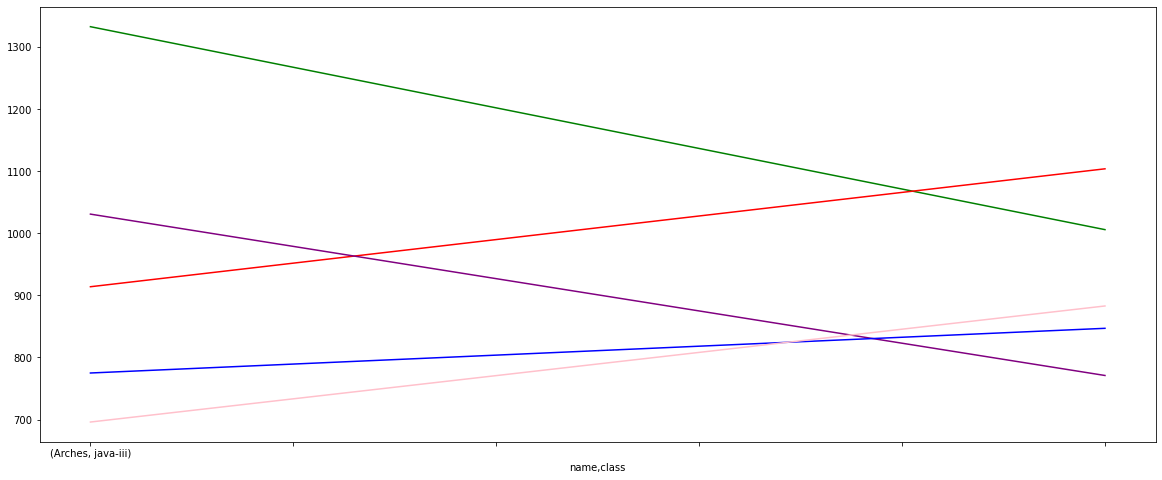

In [14]:
# viz of the top five classes
fs_php1[fs_php1['class'] == 'javascript-i'].groupby('name')['class'].value_counts().plot(figsize=(20,8),color = 'green')
fs_php1[fs_php1['class'] == 'spring'].groupby('name')['class'].value_counts().plot(color = 'red')
fs_php1[fs_php1['class'] == 'html-css'].groupby('name')['class'].value_counts().plot(color = 'purple')
fs_php1[fs_php1['class'] == 'mysql'].groupby('name')['class'].value_counts().plot(color = 'blue')
fs_php1[fs_php1['class'] == 'java-iii'].groupby('name')['class'].value_counts().plot(color = 'pink')

* not that much difference between those two cohorts for the top five accessed classes.

* FS_JAVA_program

In [15]:
fs_java = df[df.program_id == 2]

# choose the cohorts have the top 5 value
fs_java1 = fs_java[(fs_java.name == 'Ceres') | (fs_java.name == 'Zion') | (fs_java.name == 'Jupiter')|
                   (fs_java.name == 'Fortuna')| (fs_java.name == 'Voyageurs')]
fs_java1.name.value_counts()

Ceres        40730
Zion         38096
Jupiter      37109
Fortuna      36902
Voyageurs    35636
Name: name, dtype: int64

In [16]:
fs_java1['class'].value_counts().head()

javascript-i    28386
mysql           22493
html-css        21204
java-ii         15705
java-iii        15497
Name: class, dtype: int64

<AxesSubplot:xlabel='name,class'>

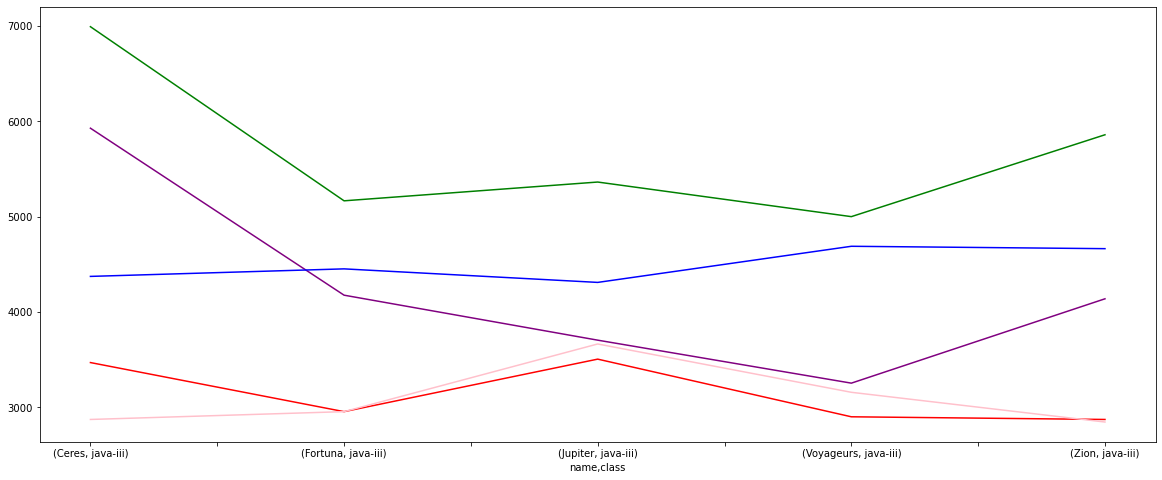

In [17]:
# viz of the top five classes
fs_java1[fs_java1['class'] == 'javascript-i'].groupby('name')['class'].value_counts().plot(figsize=(20,8),color = 'green')
fs_java1[fs_java1['class'] == 'java-ii'].groupby('name')['class'].value_counts().plot(color = 'red')
fs_java1[fs_java1['class'] == 'html-css'].groupby('name')['class'].value_counts().plot(color = 'purple')
fs_java1[fs_java1['class'] == 'mysql'].groupby('name')['class'].value_counts().plot(color = 'blue')
fs_java1[fs_java1['class'] == 'java-iii'].groupby('name')['class'].value_counts().plot(color = 'pink')

* html-css class has the biggest difference.

In [18]:
fs_java1[fs_java1['class'] == 'html-css'].groupby('name')['class'].value_counts()

name       class   
Ceres      html-css    5929
Fortuna    html-css    4177
Jupiter    html-css    3705
Voyageurs  html-css    3254
Zion       html-css    4139
Name: class, dtype: int64

<AxesSubplot:ylabel='name,class'>

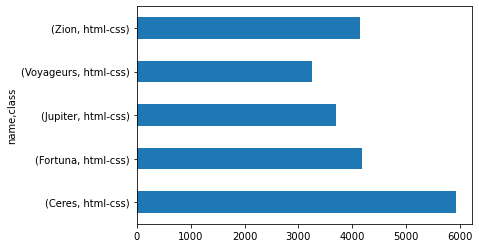

In [19]:
fs_java1[fs_java1['class'] == 'html-css'].groupby('name')['class'].value_counts().plot.barh()

In [20]:
5929/3254

1.8220651505838967

* Ceres referred html-css the most. 1.8 times more than Voyageurs.

### Q2 Answer:

1. For Data Sience program, Darden referred classification lesson a lot more than other cohorts. 
2. For Full Stack JAVA program, Ceres referred html-css class tha most.

### 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

* Here I will use Bollinder Bands to detect the unusual page view. Then find out the individual. 

In [21]:
# maybe put those functions in your prepare.py file?
def prep(df, user):
    df = df[df.user_id == user]
    pages = df['endpoint'].resample('d').count()
    return pages

def compute_pct_b(pages, span, weight, user):
    midband = pages.ewm(span=span).mean()
    stdev = pages.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    bb = pd.concat([ub, lb], axis=1)
    my_df = pd.concat([pages, midband, bb], axis=1)
    my_df.columns = ['pages', 'midband', 'ub', 'lb']
    my_df['pct_b'] = (my_df['pages'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    my_df['user_id'] = user
    return my_df

def plt_bands(my_df, user):
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(my_df.index, my_df.pages, label='Number of Pages, User: '+str(user))
    ax.plot(my_df.index, my_df.midband, label = 'EMA/midband')
    ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
    ax.plot(my_df.index, my_df.lb, label = 'Lower Band')
    ax.legend(loc='best')
    ax.set_ylabel('Number of Pages')
    plt.show()

def find_anomalies(df, user, span, weight):
    pages = prep(df, user)
    my_df = compute_pct_b(pages, span, weight, user)
    # plt_bands(my_df, user)
    return my_df[my_df.pct_b>1]

In [22]:
# create daaframe for monitor activies for active students.
df_active = df[(df.date >= df.start_date) & (df.date <= df.end_date)]

In [23]:
# use span = 30 and k = 2 billinger bands to get the anomalies
span = 30
weight = 2

anomalies_active = pd.DataFrame()
for u in list(df.user_id.unique()):
    user_df = find_anomalies(df_active, u, span, weight)
    anomalies_active = pd.concat([anomalies_active, user_df], axis=0)
anomalies_active[anomalies_active.pages < 5]

,pages,midband,ub,lb,pct_b,user_id
datetime,,,,,,
2020-07-13,1,0.064516,0.564256,-0.435224,1.435971,268
2020-01-06,4,0.731796,3.821611,-2.358019,1.028867,470
2020-12-08,3,0.193757,1.696385,-1.308871,1.433778,663
2021-01-11,4,0.485490,3.697520,-2.726539,1.047086,704
2020-12-08,2,0.151420,1.585282,-1.282443,1.144616,707
2021-01-16,2,0.159236,1.876652,-1.558180,1.035911,757


#### 1. user 268

In [24]:
# check which cohorts were using this user id
df_active[df_active.user_id == 268].name.value_counts()

Darden    1190
Xanadu     303
Name: name, dtype: int64

<AxesSubplot:xlabel='datetime'>

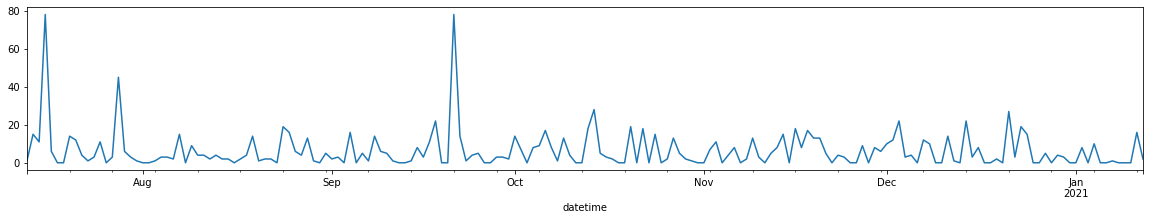

In [25]:
# user 268 in Darden 
prep(df_active[df_active.name == 'Darden'], 268).plot(figsize=(20,3))  # normal

In [27]:
# check Darden cohort program time : 2020-07-13 to 2021-01-12
df_active[(df_active.user_id == 268) & (df_active.name == 'Darden')].head(1)

,date,time,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,class,topic,program_type
datetime,,,,,,,,,,,,,,
2020-07-13 14:52:10,2020-07-13,14:52:10,/,268,59.0,173.174.200.226,Darden,#darden,2020-07-13,2021-01-12,3.0,0,0,DS_program


<AxesSubplot:xlabel='datetime'>

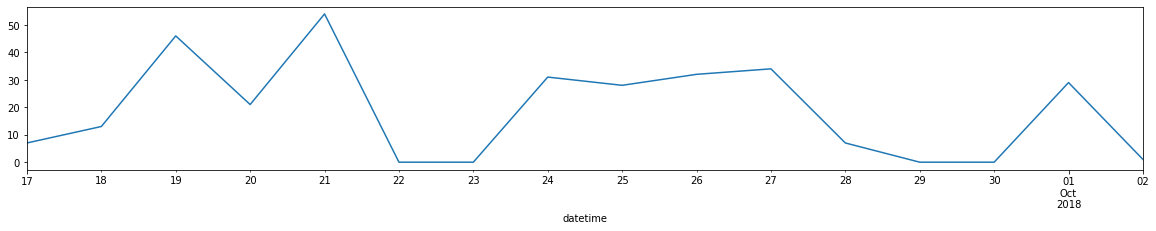

In [28]:
# user 268 in Xanadu 
prep(df_active[df_active.name == 'Xanadu'], 268).plot(figsize=(20,3)) # wired...

In [29]:
# check Xanadu cohort program time : 2018-09-17 to 2019-02-08
df_active[(df_active.user_id == 268) & (df_active.name == 'Xanadu')].head(1)

,date,time,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,class,topic,program_type
datetime,,,,,,,,,,,,,,
2018-09-17 14:16:56,2018-09-17,14:16:56,/,268,26.0,97.105.19.58,Xanadu,#xanadu,2018-09-17,2019-02-08,2.0,0,0,FS_JAVA_program


* Cohort Xanadu is from 2018-09-17 to 2019-02-08. User id 268 from cohort Xanadu didn’t log access the curriculum after two weeks of the class which is 2018-10-02.
    * This student is a in-person student in FS_JAVA program.
    * Maybe dropped the class

#### 2. user 470

In [30]:
# check which cohorts were using this user id
df_active[df_active.user_id == 470].name.value_counts()

Bayes    468
Name: name, dtype: int64

<AxesSubplot:xlabel='datetime'>

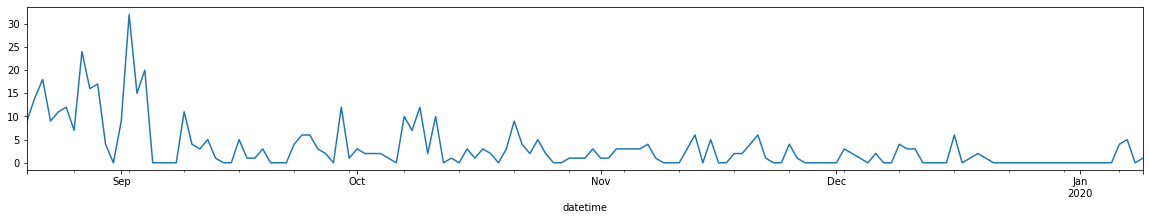

In [31]:
# chart for user 470 usage
prep(df_active, 470).plot(figsize=(20,3))  # normal

* Normal

#### 3. user 663

In [32]:
# check which cohorts were using this user id
df_active[df_active.user_id == 663].name.value_counts()

Hyperion    290
Luna          3
Name: name, dtype: int64

In [33]:
# check cohort Hyperion program time
df_active[(df_active.user_id == 663) & (df_active.name == 'Hyperion')].head(1)

,date,time,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,class,topic,program_type
datetime,,,,,,,,,,,,,,
2020-05-27 09:13:12,2020-05-27,09:13:12,/,663,58.0,76.85.110.35,Hyperion,#hyperion,2020-05-26,2020-11-10,2.0,0,0,FS_JAVA_program


<AxesSubplot:xlabel='datetime'>

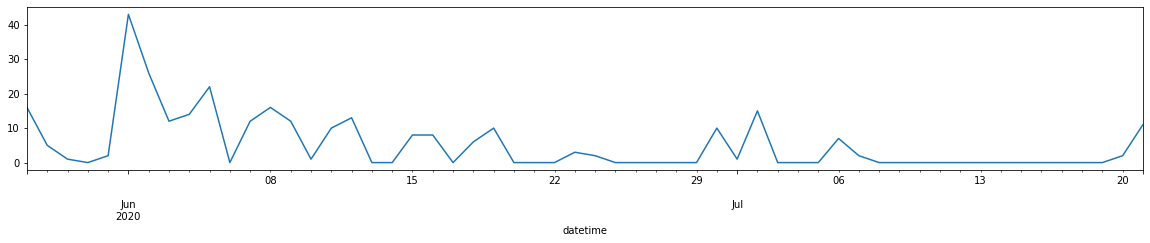

In [34]:
# plot chart for user 663 from Hyperion
prep(df_active[df_active.name == 'Hyperion'], 663).plot(figsize=(20,3))

* Cohort Hyperion is from 2020-05-26 to 2020-11-10. User id 663 from cohort Hyperion didn’t log access the curriculum after 2020-07-21.
    * This student is a remote student in FS_JAVA program.
    * Maybe dropped the class

In [35]:
# user 663 from Luna
df_active[(df_active.user_id == 663) & (df_active.name == 'Luna')]

,date,time,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,class,topic,program_type
datetime,,,,,,,,,,,,,,
2020-12-08 09:38:38,2020-12-08,09:38:38,html-css/css-i/flexbox/flexbox-in-practice,663,134.0,70.120.8.59,Luna,#luna,2020-12-07,2021-06-08,2.0,html-css,css-i,FS_JAVA_program
2020-12-08 09:50:19,2020-12-08,09:50:19,/,663,134.0,70.120.8.59,Luna,#luna,2020-12-07,2021-06-08,2.0,0,0,FS_JAVA_program
2020-12-08 09:50:25,2020-12-08,09:50:25,javascript-i,663,134.0,70.120.8.59,Luna,#luna,2020-12-07,2021-06-08,2.0,javascript-i,0,FS_JAVA_program


* User id 663 from cohort Luna didn’t log access the curriculum after the second day of the class.

#### 4. user 704

In [36]:
# check which cohorts were using this user id
df_active[df_active.user_id == 704].name.value_counts()

Bash    227
Name: name, dtype: int64

In [37]:
# check cohort Bash date frame
df_active[df_active.user_id == 704].head(1)

,date,time,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,class,topic,program_type
datetime,,,,,,,,,,,,,,
2020-07-20 14:08:30,2020-07-20,14:08:30,/,704,61.0,76.185.33.217,Bash,#bash,2020-07-20,2021-01-21,2.0,0,0,FS_JAVA_program


<AxesSubplot:xlabel='datetime'>

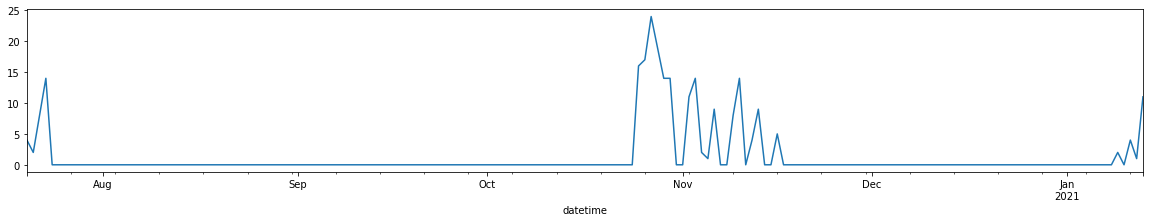

In [38]:
# user 704 usage chart
prep(df_active, 704).plot(figsize=(20,3))

* User 704 from cohort Bash only access the curriculum in the beginning for 4 days, in the  middle for about one week and at the last five days of the program

#### 5. user 707

In [39]:
# check which cohorts were using this user id
df_active[df_active.user_id == 707].name.value_counts()

Luna    559
Bash    277
Name: name, dtype: int64

<AxesSubplot:xlabel='datetime'>

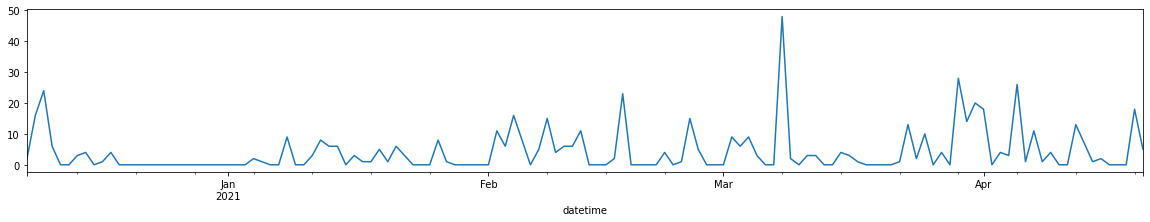

In [40]:
# user 707 from Luna
prep(df_active[df_active.name == 'Luna'], 707).plot(figsize=(20,3)) # normal

<AxesSubplot:xlabel='datetime'>

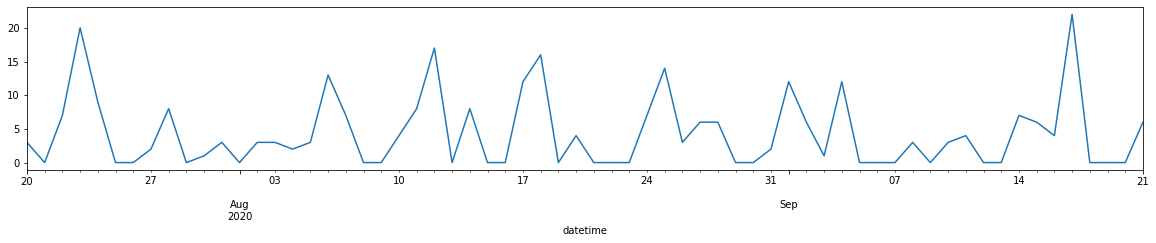

In [41]:
# user 707 from Bash
prep(df_active[df_active.name == 'Bash'], 707).plot(figsize=(20,3))

In [42]:
# check Bash program date
df_active[(df_active.user_id == 707) & (df_active.name == 'Bash')].head(1)

,date,time,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,class,topic,program_type
datetime,,,,,,,,,,,,,,
2020-07-20 14:08:42,2020-07-20,14:08:42,/,707,61.0,47.188.180.229,Bash,#bash,2020-07-20,2021-01-21,2.0,0,0,FS_JAVA_program


* Cohort Bash is from 2020-07-29 to 2021-01-21. User id 707 from cohort Bash didn’t log access the curriculum after 2020-11-20.
    * This student is a remote student in FS_JAVA program.
    * Maybe dropped the class.

#### 6. user 757

In [44]:
# check which cohorts were using this user id
df_active[df_active.user_id == 757].name.value_counts()

Jupiter    258
Name: name, dtype: int64

<AxesSubplot:xlabel='datetime'>

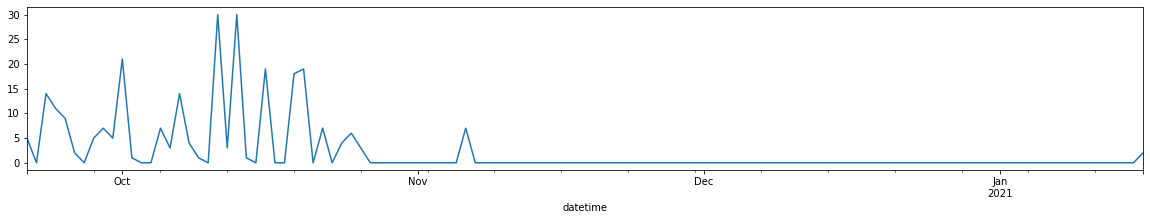

In [45]:
# user 757 from Jupiter usage
prep(df_active, 757).plot(figsize=(20,3))

In [52]:
# check Juputer program date
df_active[df_active.user_id == 757].tail(1)

,date,time,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,class,topic,program_type
datetime,,,,,,,,,,,,,,
2021-01-16 15:07:56,2021-01-16,15:07:56,toc,757,62.0,136.50.5.58,Jupiter,#jupiter,2020-09-21,2021-03-30,2.0,toc,0,FS_JAVA_program


* Cohort Jupiter is from 2020-09-21 to 2021-03-30. User id 757 from cohort Jupiter hardly access the curriculum after the class stared one month and stopped accessing the curriculum after 2021-01-16.
    * This student is a remote student in FS_JAVA program.
    * Maybe dropped the class.

### Q3 Answer:

1. The active student hardly access the curriculum is user 704 from Bash cohort, this is a remote student from Full Stack JAVA program. 
2. Students might dropped the class before program end date: 
    * User 268 from Xanadu (Full Stack JAVA, in-person),
    * user 663 from Hyperion (Full Stack JAVA, remote),
    * user 663 from Luna (Full Stack JAVA, remote),
    * user 707 from Bash (Full Stack JAVA, remote),
    * user 757 from Jupiter (Full Stack JAVA, remote).

### 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

* web-scraping detection with Bollinger Bands method

In [53]:
# user Bollinger Bands with span = 30, K = 3
span = 30
weight = 3

anomalies = pd.DataFrame()
for u in list(df.user_id.unique()):
    user_df = find_anomalies(df, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)
anomalies[anomalies.pages > 200]

,pages,midband,ub,lb,pct_b,user_id
datetime,,,,,,
2020-07-22,285,44.915959,266.290617,-176.458698,1.042257,11
2018-12-19,225,20.831494,216.533997,-174.871009,1.021630,313
2019-03-03,272,24.721632,232.200343,-182.757078,1.095913,341
2019-07-25,253,34.698961,222.709718,-153.311796,1.080555,422
2020-04-05,232,32.133967,205.731770,-141.463837,1.075658,570
2020-04-16,271,44.194413,267.834945,-179.446120,1.007076,570


### 1. user 11

In [54]:
# check all anomalies from user 11
anomalies[anomalies.user_id==11]

,pages,midband,ub,lb,pct_b,user_id
datetime,,,,,,
2018-12-17,97,10.778722,85.136992,-63.579548,1.079769,11
2019-05-07,126,20.394919,115.779945,-74.990106,1.053573,11
2020-02-04,71,13.902738,69.434283,-41.628807,1.014098,11
2020-07-22,285,44.915959,266.290617,-176.458698,1.042257,11
2021-02-22,78,12.877736,77.587641,-51.832169,1.003186,11


In [55]:
# check user name on 2020-07-22
df[(df.user_id==11) & (df.date == '2020-07-22')].name.value_counts() # this one is safe

Staff    285
Name: name, dtype: int64

In [56]:
# check user name on 2019-05-07
df[(df.user_id==11) & (df.date == '2019-05-07')].name.value_counts() # this one is safe

Staff    126
Name: name, dtype: int64

<AxesSubplot:xlabel='datetime'>

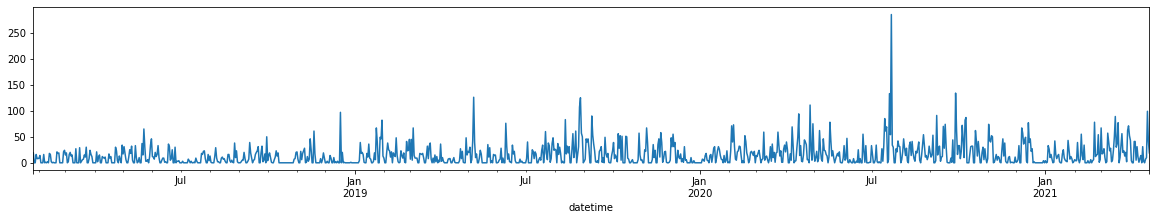

In [57]:
# chart for user 11
prep(df, 11).plot(figsize=(20,3))

* user 11 is codeup staff, it's safe.

### 2. user 313

In [58]:
# check all anomalies from user 313
anomalies[anomalies.user_id==313]

,pages,midband,ub,lb,pct_b,user_id
datetime,,,,,,
2018-12-19,225,20.831494,216.533997,-174.871009,1.02163,313


<AxesSubplot:xlabel='datetime'>

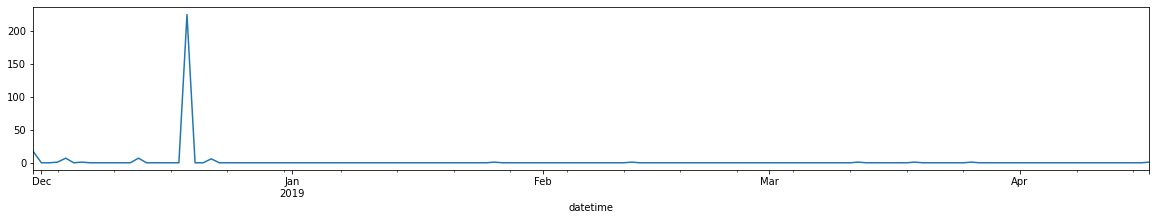

In [59]:
# viz user 313
prep(df, 313).plot(figsize=(20,3))

In [60]:
# get the cohort name for user 313
df[df.user_id==313].name.value_counts()

Arches    270
Name: name, dtype: int64

In [61]:
# get the program date for user 313
df[df.user_id==313].head(1)   # access date is 4 years later after graduate

,date,time,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,class,topic,program_type
datetime,,,,,,,,,,,,,,
2018-11-30 15:57:01,2018-11-30,15:57:01,/,313,1.0,108.199.117.96,Arches,#arches,2014-02-04,2014-04-22,1.0,0,0,FS_PHP_program


In [62]:
# check the ip
df[df.user_id==313].ip.value_counts()  # ip is not from codeup

173.173.121.126    215
108.199.117.96      50
12.31.120.82         5
Name: ip, dtype: int64

In [63]:
df[df.ip == '173.173.121.126'].user_id.value_counts() # and this ip only match one user

313    215
Name: user_id, dtype: int64

### according to the analysis, user 313 maybe from cohort Arches, did a abnormal (225 pages in one day) web scraping 4 years later after graduated with a non-codeup ip address. Consider as suspicious user.
### also 173.173.121.126 ip address only belong to user 313, consider as suspicious ip.

### 3. user 341

In [64]:
# check all anomalies from user 341
anomalies[anomalies.user_id==341]

,pages,midband,ub,lb,pct_b,user_id
datetime,,,,,,
2019-03-03,272,24.721632,232.200343,-182.757078,1.095913,341
2020-02-18,3,0.193548,2.442380,-2.055283,1.123980,341
2020-03-10,4,0.305768,3.479509,-2.867973,1.082000,341
2020-04-21,109,7.250725,88.818626,-74.317176,1.123709,341
2020-07-13,52,6.283047,45.711487,-33.145393,1.079746,341
2020-10-03,11,0.991326,10.107234,-8.124582,1.048967,341
2020-10-25,10,0.873729,9.489350,-7.741892,1.029635,341
2021-02-09,10,0.659630,8.244463,-6.925203,1.115727,341


In [65]:
df[df.user_id==341].name.value_counts() # this user id only match one person which is great!

Zion    1581
Name: name, dtype: int64

In [66]:
# check the program date
df[df.user_id==341].head(1)

,date,time,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,class,topic,program_type
datetime,,,,,,,,,,,,,,
2019-01-22 15:23:24,2019-01-22,15:23:24,/,341,29.0,97.105.19.58,Zion,#zion,2019-01-22,2019-06-04,2.0,0,0,FS_JAVA_program


In [67]:
# check for ip on date 2019-03-03
df[(df.user_id==341) & (df.date == '2019-03-03')].ip.value_counts()

204.44.112.76      180
173.174.243.231     92
Name: ip, dtype: int64

In [68]:
# check for ip on date 2020-04-21
df[(df.user_id==341) & (df.date == '2020-04-21')].ip.value_counts()

172.124.70.146    109
Name: ip, dtype: int64

In [69]:
# check all ip for user 341
df[df.user_id==341].ip.value_counts()

97.105.19.58       677
172.124.70.146     462
173.174.243.231    233
204.44.112.76      180
70.123.203.131      25
192.171.117.210      4
Name: ip, dtype: int64

In [70]:
# who is ip 204.44.112.76 belong?
df[df.ip=='204.44.112.76'].user_id.value_counts()

341    180
Name: user_id, dtype: int64

* It seems user 341 did a web-scraping during the class and after graduate.
* ip 204.44.112.76 seems like a web-scraping machine.

### 4. user 422

In [71]:
# check all anomalies from user 422
anomalies[anomalies.user_id==422]

,pages,midband,ub,lb,pct_b,user_id
datetime,,,,,,
2019-07-25,253,34.698961,222.709718,-153.311796,1.080555,422


In [72]:
df[df.user_id==422].name.value_counts() # this user id only match one person

Betelgeuse    1096
Name: name, dtype: int64

In [73]:
df[df.user_id == 422].head(1) # check the program date

,date,time,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,class,topic,program_type
datetime,,,,,,,,,,,,,,
2019-05-29 10:08:20,2019-05-29,10:08:20,/,422,32.0,97.105.19.58,Betelgeuse,#betelgeuse,2019-05-28,2019-10-08,2.0,0,0,FS_JAVA_program


<AxesSubplot:xlabel='datetime'>

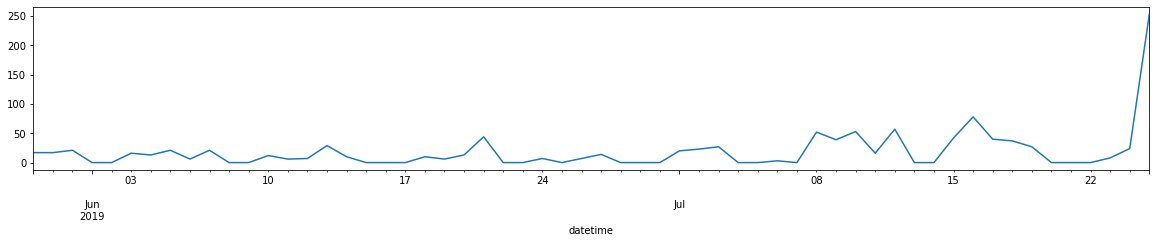

In [74]:
# chart for 422 pages accessed
prep(df, 422).plot(figsize=(20,3))

In [75]:
df[(df.user_id==422) & (df.date == '2019-07-25')].ip.value_counts() # check ip for 2019-07-25

97.105.19.58    253
Name: ip, dtype: int64

* web scraping by codeup student in codeup facility during class.

### 5. user 570

In [76]:
# check all anomalies from user 570
anomalies[anomalies.user_id==570]

,pages,midband,ub,lb,pct_b,user_id
datetime,,,,,,
2020-04-05,232,32.133967,205.731770,-141.463837,1.075658,570
2020-04-16,271,44.194413,267.834945,-179.446120,1.007076,570
2020-08-10,66,7.040462,60.216039,-46.135116,1.054385,570
2021-02-08,3,0.195577,2.464699,-2.073546,1.117953,570
2021-02-11,53,3.579468,43.234126,-36.075191,1.123137,570


In [77]:
df[df.user_id==570].name.value_counts() # this user id only match one person

Fortuna    4584
Name: name, dtype: int64

In [78]:
df[(df.user_id==570) & (df.date == '2020-04-16')].ip.value_counts()  # check ip

172.124.67.93    223
45.132.226.7      48
Name: ip, dtype: int64

In [79]:
df[(df.user_id==570) & (df.date == '2020-04-05')].ip.value_counts()  # check ip

172.124.67.93    232
Name: ip, dtype: int64

In [80]:
df[df.user_id == 570].ip.value_counts().head()  # check all ip from user 570

172.124.67.93    2530
97.105.19.58      784
67.10.164.55      244
104.238.45.6      186
70.123.202.50     101
Name: ip, dtype: int64

In [81]:
df[df.user_id == 570].head(1)  # check program date

,date,time,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,class,topic,program_type
datetime,,,,,,,,,,,,,,
2020-01-13 16:02:26,2020-01-13,16:02:26,/,570,53.0,97.105.19.58,Fortuna,#fortuna,2020-01-13,2020-06-23,2.0,0,0,FS_JAVA_program


<AxesSubplot:xlabel='datetime'>

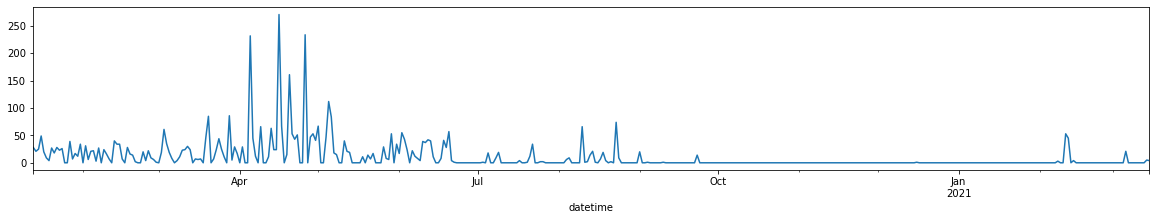

In [82]:
# chart for user 570 pages accessed
prep(df, 570).plot(figsize=(20,3))

* web scraping by codeup student during class.

### Strangers detection --- explor the null data

In [83]:
# get all the null value from main database
df_null = df[df.cohort_id.isnull()]
df_null.shape

(52893, 14)

In [84]:
# user Bollinger Bands method, span = 30, K = 3
span = 30
weight = 3

anomalies_null = pd.DataFrame()
for u in list(df.user_id.unique()):
    user_df = find_anomalies(df_null, u, span, weight)
    anomalies_null = pd.concat([anomalies_null, user_df], axis=0)

In [85]:
# investgate any user id accessed over 100 pages per day.
anomalies_null[anomalies_null.pages > 100]

,pages,midband,ub,lb,pct_b,user_id
datetime,,,,,,
2018-06-24,158,16.516319,142.413376,-109.380738,1.061902,111
2019-03-27,184,26.524183,162.499722,-109.451357,1.079059,354
2019-05-30,130,24.252047,122.492668,-73.988574,1.038209,354


### user 111

<AxesSubplot:xlabel='datetime'>

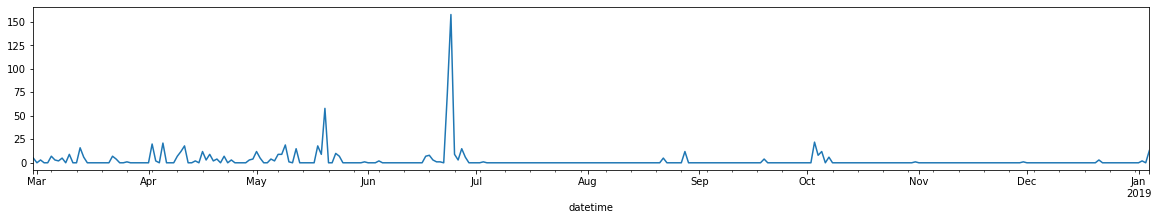

In [86]:
# pages accessed chart for user 111
prep(df_null, 111).plot(figsize=(20,3))

In [87]:
# check the name for user 111
df[df.user_id == 111].name.value_counts().head()

Series([], Name: name, dtype: int64)

In [88]:
df[df.user_id == 111].ip.value_counts().head() # not in codeup

67.11.134.242     405
70.117.6.133      182
70.123.203.131     28
172.58.99.200      14
71.42.116.142      12
Name: ip, dtype: int64

In [89]:
df[(df.user_id == 111) & (df.date == '2018-06-24')].ip.value_counts() # check ip on 2018-06-24

67.11.134.242    158
Name: ip, dtype: int64

In [90]:
# check the user id with the abnormal ip
df[df.ip == '67.11.134.242'].user_id.value_counts()

111    405
Name: user_id, dtype: int64

### can't identity user 111 and ip 67.11.134.242, consider as suspicous!

### user 354

In [92]:
# check the name for user 354 in whole data
df[df.user_id == 354].name.value_counts().head()

Series([], Name: name, dtype: int64)

<AxesSubplot:xlabel='datetime'>

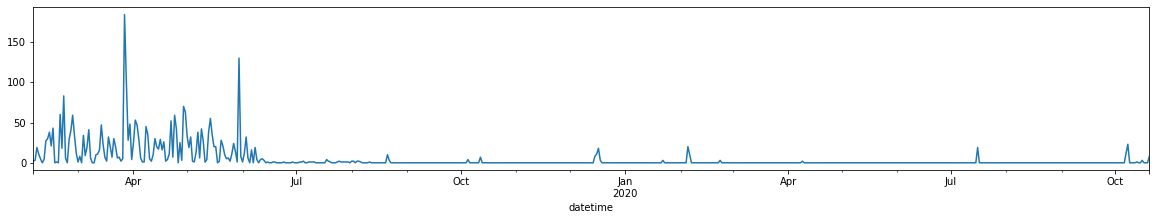

In [93]:
# pages accessed number for user 354
prep(df_null, 354).plot(figsize=(20,3))

In [94]:
# check the ip for the abnormal date 2019-03-27
df[(df.user_id == 354) & (df.date == '2019-03-27')].ip.value_counts()

45.23.250.16    105
97.105.19.58     79
Name: ip, dtype: int64

In [95]:
# check the ip for the abnormal date 2019-05-30
df[(df.user_id == 354) & (df.date == '2019-05-30')].ip.value_counts()

97.105.19.58    126
45.23.250.16      4
Name: ip, dtype: int64

In [96]:
# check the non-codep ip to see if this ip match to other users
df[df.ip == '45.23.250.16'].user_id.value_counts()

354    741
Name: user_id, dtype: int64

* 97.105.19.58 is codeup ip address.
* Maybe user 354 used to work or a student in codeup and still have access to the curriculum. Need to clean user 354 out.

### Q4 Answer:

1. User 313 with ip 173.173.121.126 : web-scarping 225 pages/day 4 years after leaving codeup. 
2. Ip 204.44.112.76 : consider as web-scraping machine.
3. User 111 with ip 67.11.134.242 : can not identify any information.
4. User 354 : need to be cleaned out from the system.
